<a href="https://colab.research.google.com/github/imranaljahsyi/Coursera_Capstone/blob/main/Battle_of_the_Neighborhoods_Notebook_Spice_Route_into_the_Big_Apple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Battle of the Neighborhoods - Coursera Capstone Project**

# **Introduction/ Business Problem**

 *Our client, an importer of essential chinese cuisine ingredients is looking to expand into the United States of America, primarily setting up shop in New York. The company wants insights into neighborhoods and chinese restaurants in the city so that it can develop a territorial strategy on considerations such as the size of the chinese cuisine market in New York and the number of prime restaurants in the 5 burroughs  (Manhattan, Queens, Brooklyn, The Bronx, Staten Island).* 
 
*In knowing how many chinese restaurants are in each burough, our client will be able to identify, where best to set up stores to meet a large demand. Additionally, it would also like identify which of these restaurants have the highest ratings, as this in turn could be used for them to strategise sales and marketing growth through having a high-profile line of buyers.*
 
 *This project will explore the location data of Ney York City and how we can help our client (the fintech company) develop their strategy based on the insights we've obtained.*


**Applicable problem statements**

* Which of the 5 burroughs has the most neighborhoods?
* What is the number of chinese restaurants in New York City?
* Which areas are have the most chinese restaurants ?
* Which of New York's five buroughs (Manhattan, Queens, Brooklyn, The Bronx, Staten Island) has the best chinese restaurants in New York City?
* Which of New York's five buroughs (Manhattan, Queens, Brooklyn, The Bronx, Staten Island) has the the most best rated chinese restaurants in New York City?
* Which burough should one set up shop in order to meet high demand?


# **Data** 

For this project we need the following data :

1.	Restaurants data that contains list Locality, Restaurant name, Rating along with their latitude and longitude in New York City.
   -	Foursquare API to obtain venues & details. 
   -	scraping from https://cocl.us/new_york_dataset to obtain Ney York City data set.

2.	Nearby places in each locality of New York City. By using API’s, we will get all the venues (Chinese restaurants) in each neighborhood.
   -	Foursquare API

# **Methodology**

1.	Collect the New York data from dataset source using the NYC Public Dataset. From this we should be able to see the area with the most neighborhoods among the 5 boroughs of New York City.

2.	Using the Foursquare API to find Chinese restaurants for each neighborhood and identify the ones with the best ratings using the following libraries:
*	pandas (data framing)
*	NumPy/ SciPy (mathematical calculations)
*	matplotlib (data visualization & plotting)
*	Folium (geospatial visualization). 



# **Results**

## 1.  **Collect the New York data from dataset source using NYC Public Dataset**.
  
  *(Extract, Load & Transform data from the dataset)* 

In [ ]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium 
from bs4 import BeautifulSoup

In [ ]:
# Define Foursquare Credentials and Version

CLIENT_ID = 'LQBDROVBH1LNM2HNTKQ55LVGXHAHJVFAKRIYO4EVTQD2CWPB' # Foursquare ID
CLIENT_SECRET = 'S43BCXNCJKG0YLAW34X2QT1MJBGIRHCCKLKCD0X10YXMF1SY' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [ ]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

def get_venues(lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get data
    results = requests.get(url).json()
    venue_data=results['response']['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # data is present in features label
    features=resp['features']
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    return new_york_data

In [ ]:
df_NY = get_new_york_data()
df_NY.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [ ]:
df_NY.shape

(306, 4)

In [ ]:
print('Number of boroughs is: {}, while number of neighbourhoods is: {}.'.format(
        len(df_NY['Borough'].unique()),
        df_NY.shape[0]
    )
)

Number of boroughs is: 5, while number of neighbourhoods is: 306.


In [ ]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent = 'my-application')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The coordinates of New York City are {}, {}.'.format(latitude, longitude))

The coordinates of New York City are 40.7127281, -74.0060152.


In [ ]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhoods in zip(df_NY['Latitude'], df_NY['Longitude'], df_NY['Borough'], df_NY['Neighborhood']):
    label = '{}, {}'.format(neighborhoods, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='#3180cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

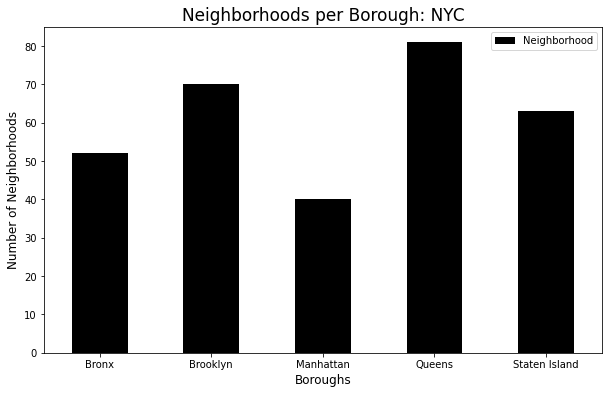

In [ ]:
#Visualising the NYC Public Dataset
import matplotlib. pyplot as plt

clr = "black"
df_NY.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(10,6), color=clr)
plt.title('Neighborhoods per Borough: NYC', fontsize = 17)
plt.xlabel('Boroughs', fontsize = 12)
plt.ylabel('Number of Neighborhoods',fontsize = 12)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

From here we can see that **Queens has the most neighborhoods(80)**, followed by Brooklyn (70), Staten Island (66),  The Bronx (50) and Manhattan (40). 

## 2.  **Using the Foursquare API to find Chinese restaurants for each neighborhood and identify the ones with the best ratings**. 

Now, let's furter explore the chinese food market in each neighborhood within the 5 burroughs

In [ ]:
column_names=['Borough', 'Neighborhood', 'ID','Name']
chinese_restaurants_ny=pd.DataFrame(columns=column_names)
count=1
for row in df_NY.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    chinese_restaurants=venues[venues['Category']=='Chinese Restaurant']   
    print('(',count,'/',len(df_NY),')','Chinese Restaurants in '+Neighborhood+', '+Borough+':'+str(len(chinese_restaurants)))
    print(row)
    for resturant_detail in chinese_restaurants.values.tolist():
        id, name , category=resturant_detail
        chinese_restaurants_ny = chinese_restaurants_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Chinese Restaurants in Wakefield, Bronx:0
['Bronx', 'Wakefield', 40.89470517661, -73.84720052054902]
( 2 / 306 ) Chinese Restaurants in Co-op City, Bronx:0
['Bronx', 'Co-op City', 40.87429419303012, -73.82993910812398]
( 3 / 306 ) Chinese Restaurants in Eastchester, Bronx:1
['Bronx', 'Eastchester', 40.887555677350775, -73.82780644716412]
( 4 / 306 ) Chinese Restaurants in Fieldston, Bronx:0
['Bronx', 'Fieldston', 40.89543742690383, -73.90564259591682]
( 5 / 306 ) Chinese Restaurants in Riverdale, Bronx:0
['Bronx', 'Riverdale', 40.890834493891305, -73.9125854610857]
( 6 / 306 ) Chinese Restaurants in Kingsbridge, Bronx:0
['Bronx', 'Kingsbridge', 40.88168737120521, -73.90281798724604]
( 7 / 306 ) Chinese Restaurants in Marble Hill, Manhattan:0
['Manhattan', 'Marble Hill', 40.87655077879964, -73.91065965862981]
( 8 / 306 ) Chinese Restaurants in Woodlawn, Bronx:0
['Bronx', 'Woodlawn', 40.89827261213805, -73.86731496814176]
( 9 / 306 ) Chinese Restaurants in Norwood, Bronx:1
['

In [ ]:
chinese_restaurants_ny.to_csv('chinese_restaurants_ny_tocsv1.csv')

In [ ]:
chinese_ny = pd.read_csv('chinese_restaurants_ny_tocsv1.csv')
chinese_restaurants_ny.shape

(177, 4)

This is good. Now we see the total market size of the 5 buroughs. There are a total of 177 Chinese Restaurants.

In [ ]:
chinese_restaurants_ny.head(10)

,Borough,Neighborhood,ID,Name
0,Bronx,Eastchester,4dabc3dc93a04642f09ccabd,Xing Lung Chinese Restaurant
1,Bronx,Norwood,4d3545a38250f04d6dd20ce1,Panda House
2,Bronx,Pelham Parkway,4b9d6b45f964a52078ab36e3,Mr. Q's Chinese Restaurant
3,Bronx,Bedford Park,4e4d0387bd413c4cc66dfd72,Hung Hing Chinese Restaurant
4,Bronx,Bedford Park,4cba4a550180721ebb739961,Rose Flower Chinese
5,Bronx,Bedford Park,4c87c9930dcb8cfa68e63d68,New Xing Wang Chinese Restaurant
6,Bronx,Fordham,4cf30a837e93f04d366a5669,China Wok II
7,Bronx,West Farms,4cd0d4d77b6854810401c4f8,Food Hai
8,Bronx,Soundview,4cc63e36bde8f04dcbfeb54b,Golden City Chinese Restaurant
9,Bronx,Soundview,4e656e8252b1260c14683b4b,Kee Hing Restaurant


In [ ]:
chinese_restaurants_ny.tail(10)

,Borough,Neighborhood,ID,Name
167,Staten Island,Manor Heights,4be75c8f2468c928fc720243,Tack's Chinese Take Out
168,Staten Island,Willowbrook,5756be91cd1086df18e54a5d,Peking Kitchen
169,Brooklyn,Homecrest,4b46743ff964a520892126e3,"Golden ""Z"" Restaurant"
170,Brooklyn,Homecrest,4d28b924ebacb1f72efbf34f,Wing Hing Seafood Restaurant
171,Brooklyn,Homecrest,4b3eb496f964a52022a125e3,Yee Kee H.K. Style
172,Brooklyn,Homecrest,514645bae4b0238f38bcdbac,Season Restaurant
173,Staten Island,Prince's Bay,4bb7d282b35776b0b83dc801,Island Taste
174,Bronx,Allerton,4c7dbf7f10916dcba78e2a96,Chef King
175,Bronx,Kingsbridge Heights,4d965fd061a3a1cde4989a42,Lucky Star Chinese Restaurant
176,Brooklyn,Erasmus,4e10c87122713f7d7bcb9d1d,Kam Man Chinese Food


Visualising the data

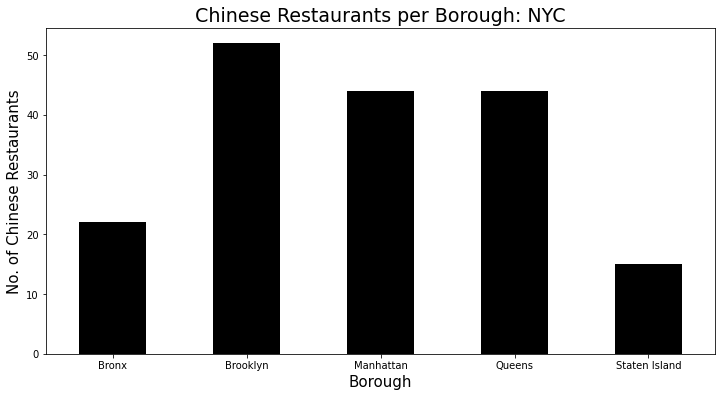

In [ ]:
chinese_restaurants_ny.groupby('Borough')['ID'].count().plot.bar(figsize=(12,6), color=clr)
plt.title('Chinese Restaurants per Borough: NYC', fontsize = 19)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. of Chinese Restaurants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

From here we can see that **Brooklyn has the most Chinese restaurants (50)**, followed by Manhattan (45) and Queens (45), The Bronx (20) and Staten Island (17).

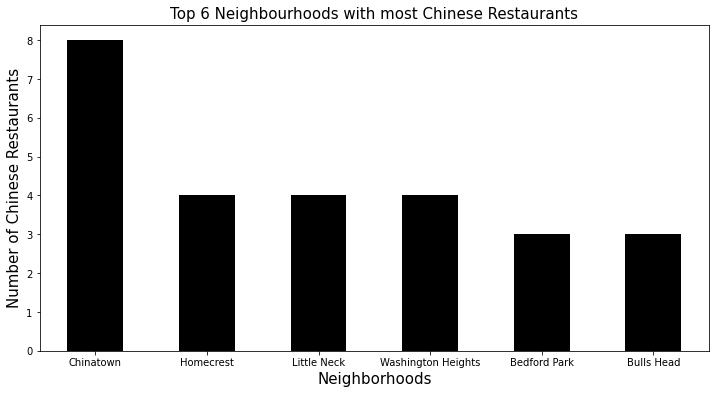

In [ ]:
top_ten_chinese = 6 # top number for graphing all the same past 6
chinese_restaurants_ny.groupby('Neighborhood')['ID'].count().nlargest(top_ten_chinese ).plot.bar(figsize=(12,6), color=clr)
plt.title('Top 6 Neighbourhoods with most Chinese Restaurants', fontsize = 15)
plt.xlabel('Neighborhoods', fontsize = 15)
plt.ylabel('Number of Chinese Restaurants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

In [ ]:
chinese_restaurants_ny[chinese_restaurants_ny['Neighborhood']=='East Flatbush']

,Borough,Neighborhood,ID,Name
22,Brooklyn,East Flatbush,4fab21d1e4b0be1a3d54b15c,king
23,Brooklyn,East Flatbush,4c6b208e0c3ac9b6be76d138,China Express


In [ ]:
chinese_restaurants_ny[chinese_restaurants_ny['Neighborhood']=='Chinatown']

,Borough,Neighborhood,ID,Name
54,Manhattan,Chinatown,4db3374590a0843f295fb69b,Spicy Village
55,Manhattan,Chinatown,4a96bf8ff964a520ce2620e3,Wah Fung Number 1 Fast Food 華豐快餐店
56,Manhattan,Chinatown,5894c9a15e56b417cf79e553,Xi'an Famous Foods
57,Manhattan,Chinatown,5c965dad5455b2002c058659,Yi Ji Shi Mo Noodle Corp
58,Manhattan,Chinatown,59d828f0916bc1155fde2c04,Hwa Yuan
59,Manhattan,Chinatown,3fd66200f964a520b1ea1ee3,Great N.Y. Noodletown
60,Manhattan,Chinatown,59ad625a2619ee5cdded881f,House Special 甘來飯店
61,Manhattan,Chinatown,3fd66200f964a520ede41ee3,Big Wong King 大旺


Chinatown seems to be the nighbourhood with the most restaurants (8)! Now that we have their names, let's get the ranks !

In [ ]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
chinese_restaurants_stats_ny=pd.DataFrame(columns=column_names)
count=1
for row in chinese_restaurants_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # value of 0 is assigned for these kinds resturants as they may have been 
        #recently opened or details dont exist in FourSquare's database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(chinese_restaurants_ny),')','processed')
    chinese_restaurants_stats_ny = chinese_restaurants_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1
chinese_restaurants_stats_ny

{'meta': {'code': 200, 'requestId': '5fe21e5bba978f64279f2337'}, 'response': {'venue': {'id': '4dabc3dc93a04642f09ccabd', 'name': 'Xing Lung Chinese Restaurant', 'contact': {'phone': '7183241014', 'formattedPhone': '(718) 324-1014'}, 'location': {'address': '3828 B Dyre Ave', 'crossStreet': 'E 233 St', 'lat': 40.8887854684858, 'lng': -73.83122576835156, 'labeledLatLngs': [{'label': 'display', 'lat': 40.8887854684858, 'lng': -73.83122576835156}], 'postalCode': '10466', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['3828 B Dyre Ave (E 233 St)', 'Bronx, NY 10466', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/xing-lung-chinese-restaurant/4dabc3dc93a04642f09ccabd', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}, 'primary': True}], 'verified': Fals

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Eastchester,4dabc3dc93a04642f09ccabd,Xing Lung Chinese Restaurant,6,6.7,0
1,Bronx,Norwood,0,0,0,0.0,0
2,Bronx,Pelham Parkway,4b9d6b45f964a52078ab36e3,Mr. Q's Chinese Restaurant,10,7.7,10
3,Bronx,Bedford Park,4e4d0387bd413c4cc66dfd72,Hung Hing Chinese Restaurant,5,6.4,2
4,Bronx,Bedford Park,0,0,0,0.0,0
5,Bronx,Bedford Park,0,0,0,0.0,0
6,Bronx,Fordham,0,0,0,0.0,0
7,Bronx,West Farms,0,0,0,0.0,0
8,Bronx,Soundview,0,0,0,0.0,0
9,Bronx,Soundview,0,0,0,0.0,0


In [ ]:
chinese_restaurants_stats_ny.to_csv('chinese_restaurants_stats_ny.csv.csv')

Let's do some cleaning 

In [ ]:
chinese_restaurants_stats_ny.shape

(177, 7)

In [ ]:
chinese_restaurants_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       177 non-null    object 
 1   Neighborhood  177 non-null    object 
 2   ID            177 non-null    object 
 3   Name          177 non-null    object 
 4   Likes         177 non-null    object 
 5   Rating        177 non-null    float64
 6   Tips          177 non-null    object 
dtypes: float64(1), object(6)
memory usage: 9.8+ KB


In [ ]:
chinese_restaurants_stats_ny['Likes'] = chinese_restaurants_stats_ny['Likes'].astype('float64')
chinese_restaurants_stats_ny['Tips'] = chinese_restaurants_stats_ny['Tips'].astype('float64')
chinese_restaurants_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       177 non-null    object 
 1   Neighborhood  177 non-null    object 
 2   ID            177 non-null    object 
 3   Name          177 non-null    object 
 4   Likes         177 non-null    float64
 5   Rating        177 non-null    float64
 6   Tips          177 non-null    float64
dtypes: float64(3), object(4)
memory usage: 9.8+ KB


Lets have a look at our data even further

In [ ]:
chinese_restaurants_stats_ny.describe()

,Likes,Rating,Tips
count,177.000000,177.000000,177.000000
mean,56.265537,4.779661,20.977401
std,167.330656,3.647498,58.950668
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,6.000000,6.600000,4.000000
75%,26.000000,7.800000,11.000000
max,1483.000000,9.100000,521.000000


Now to identify the restaurants with the highest stats.

In [ ]:
# Most Likes
chinese_restaurants_stats_ny.iloc[chinese_restaurants_stats_ny['Likes'].idxmax()]

Borough                        Manhattan
Neighborhood                     Chelsea
ID              44e9b421f964a520a5371fe3
Name                            Buddakan
Likes                               1483
Rating                                 9
Tips                                 521
Name: 80, dtype: object

In [ ]:
# Most Ratings
chinese_restaurants_stats_ny.iloc[chinese_restaurants_stats_ny['Rating'].idxmax()]

Borough                        Manhattan
Neighborhood                    Flatiron
ID              59035bc43d47912d4b97f3fc
Name                  Xi'an Famous Foods
Likes                                212
Rating                               9.1
Tips                                  43
Name: 164, dtype: object

In [ ]:
#Most Tips
chinese_restaurants_stats_ny.iloc[chinese_restaurants_stats_ny['Tips'].idxmax()]

Borough                        Manhattan
Neighborhood                     Chelsea
ID              44e9b421f964a520a5371fe3
Name                            Buddakan
Likes                               1483
Rating                                 9
Tips                                 521
Name: 80, dtype: object

From here let's see the maximum average restaurant ratings across neighbourhoods & boroughs

In [ ]:
#Neighbourhoods in NYC with highest average ratings for Chinese Restaurants
NY_neighborhood_stats=chinese_restaurants_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
NY_neighborhood_stats.columns=['Neighborhood','Average Rating']
NY_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
42,Flatiron,9.100000
18,Chelsea,9.000000
71,Murray Hill,8.900000
112,West Village,8.800000
107,Upper West Side,8.800000
116,Woodside,8.500000
35,East Village,8.500000
76,North Side,8.450000
63,Lower East Side,8.450000
32,Downtown,8.433333


In [ ]:
chinese_restaurants_stats_ny.sort_values(['Rating'],ascending=False).head(10)

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
164,Manhattan,Flatiron,59035bc43d47912d4b97f3fc,Xi'an Famous Foods,212.0,9.1,43.0
80,Manhattan,Chelsea,44e9b421f964a520a5371fe3,Buddakan,1483.0,9.0,521.0
86,Manhattan,Lower East Side,5b380f649deb7d00399fdf9d,Kings County Imperial,77.0,9.0,10.0
56,Manhattan,Chinatown,5894c9a15e56b417cf79e553,Xi'an Famous Foods,105.0,9.0,29.0
47,Brooklyn,North Side,58df00318cfe546addb99246,Birds of a Feather,352.0,9.0,75.0
24,Brooklyn,Windsor Terrace,54e39b14498e9c646b42958e,East Wind Snack Shop,142.0,8.9,51.0
79,Manhattan,Murray Hill,4e3484038877beb5e9a22a0b,Café China,1046.0,8.9,273.0
85,Manhattan,East Village,5647ee82498e8bfc0ddef53d,Málà Project,439.0,8.9,91.0
91,Manhattan,West Village,526eeb54498e9674b5d9034a,Decoy,336.0,8.9,105.0
74,Manhattan,Upper West Side,5529bfd8498ec6ce692d8015,Han Dynasty,322.0,8.8,66.0


In [ ]:
#Buroughs in NYC with highest average ratings for Chinese Restaurants
NY_borough_stats=chinese_restaurants_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
NY_borough_stats.columns=['Borough','Average Rating']
NY_borough_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Borough,Average Rating
2,Manhattan,7.806818
3,Queens,4.613636
1,Brooklyn,4.196154
0,Bronx,2.454545
4,Staten Island,1.820000


Visualisation of data:

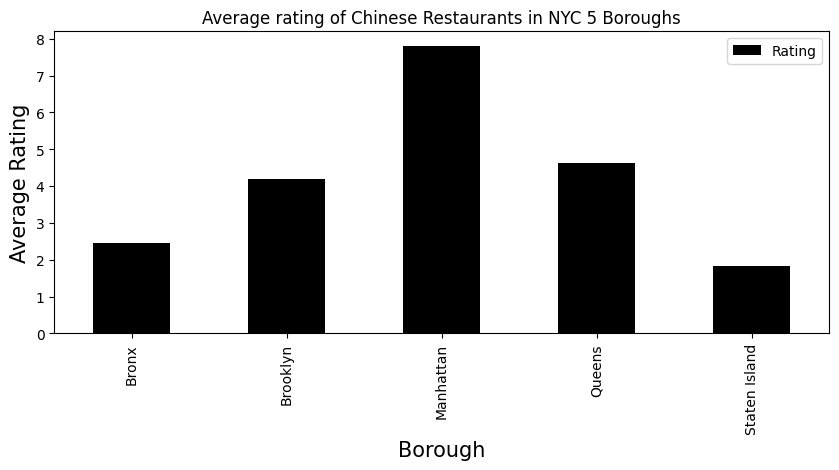

In [44]:
plt.figure(figsize=(10,4), dpi = 100)
plt.title('Average rating of Chinese Restaurants in NYC 5 Boroughs')
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('Average Rating', fontsize=15)
chinese_restaurants_stats_ny.groupby('Borough').mean()['Rating'].plot(kind='bar', color=clr)
plt.legend()
plt.show()

In [ ]:
NY_neighborhood_stats=NY_neighborhood_stats[NY_neighborhood_stats['Average Rating']>=8.0]
NY_neighborhood_stats

,Neighborhood,Average Rating
18,Chelsea,9.000000
19,Chinatown,8.387500
25,College Point,8.300000
32,Downtown,8.433333
35,East Village,8.500000
37,Elmhurst,8.050000
42,Flatiron,9.100000
45,Forest Hills,8.000000
51,Greenwich Village,8.233333
61,Little Italy,8.300000


In [ ]:
NY_neighborhood_stats=pd.merge(NY_neighborhood_stats,df_NY, on='Neighborhood')
NY_neighborhood_stats=NY_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
NY_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Manhattan,Chelsea,40.744035,-74.003116,9.000000
1,Staten Island,Chelsea,40.594726,-74.189560,9.000000
2,Manhattan,Chinatown,40.715618,-73.994279,8.387500
3,Queens,College Point,40.784903,-73.843045,8.300000
4,Brooklyn,Downtown,40.690844,-73.983463,8.433333
5,Manhattan,East Village,40.727847,-73.982226,8.500000
6,Queens,Elmhurst,40.744049,-73.881656,8.050000
7,Manhattan,Flatiron,40.739673,-73.990947,9.100000
8,Queens,Forest Hills,40.725264,-73.844475,8.000000
9,Manhattan,Greenwich Village,40.726933,-73.999914,8.233333


In [ ]:
ny_chinese_restaurant_map = folium.Map(location=geo_location('New York'), zoom_start=12)
# instantiate a feature group for the ratings in the dataframe
rating = folium.map.FeatureGroup()

# loop through the ratings and add each to the neighborhood feature group
for lat, lng, in NY_neighborhood_stats[['Latitude','Longitude']].values:
    rating.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
ny_chinese_restaurant_map

Looks about right. Now let us add some labels to this

In [ ]:
NY_neighborhood_stats['Label']=NY_neighborhood_stats['Neighborhood']+', '+NY_neighborhood_stats['Borough']+'('+NY_neighborhood_stats['Average Rating'].map(str)+')'
# add pop-up text to each marker on the map
for lat, lng, label in NY_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_chinese_restaurant_map)        
# add ratings to map
ny_chinese_restaurant_map.add_child(rating)

# **Discussions**

1. **Which of the 5 boroughs has the most neighborhoods?**
 * Queens has the most neighborhoods (80), followed by Brooklyn (70), Staten Island (66), The Bronx (50) and Manhattan (40).

2. **What is the number of Chinese restaurants in New York City?**
 *	There are a total of 177 Chinese restaurants across the 5 boroughs.


3. **Which areas (boroughs & neighborhoods) have the most Chinese restaurants?**
 * Brooklyn has the most Chinese restaurants (50), followed by Manhattan (45) and Queens (45), The Bronx (20) and Staten Island (17). 
 * Manhattan has the most Chinese restaurants (8 in Chinatown and 4 in Washington Heights), followed by Homecrest in Brooklyn (4), Little Neck in Queens (4), Bedford Park in The Bronx (3), and Bulls Head in Staten Island (3)

4. **Which of New York's five boroughs (Manhattan, Queens, Brooklyn, The Bronx, Staten Island) has the most acclaimed Chinese restaurants in New York City?**
 * MOST LIKES & TIPS: Budakkan in Chelsea, Manhattan (**1483 Likes**, 9.0 Rating, and **521 Tips**)
 * MOST RATINGS: Xi'an Famous Foods in Flatiron, Manhattan (212 Likes, **9.1 Rating**, 43 Tips)

5. **What are the Top 10 Highly Rated Chinese Restaurants in the 5 boroughs 
(Manhattan, Queens, Brooklyn, The Bronx, Staten Island)?**

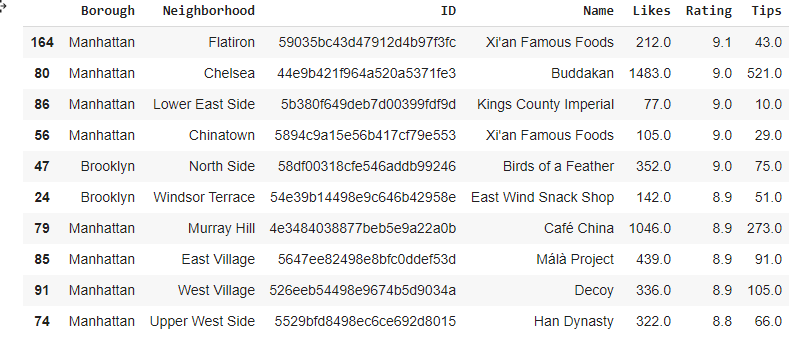


6. **Where should our client set up shop among New York's five boroughs (Manhattan, Queens, Brooklyn, The Bronx, Staten Island)?**

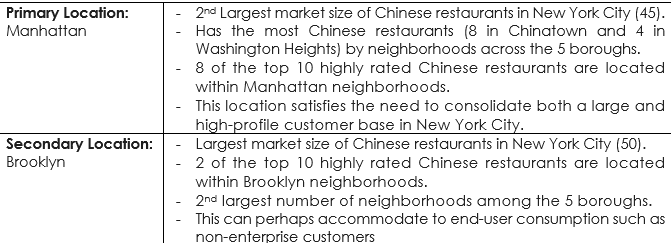

# **Conclusion**

We can say that our client has the potential to expand strategically if it were to consider penetrating the New York City market of Chinese restaurants through **Manhattan and/or Brooklyn**. This much is owed to the large number of high-profile Chinese restaurants in Manhattan and a substantial middle-to-low end market in both Manhattan and Brooklyn. 

Distribution of goods can be given high priority in both areas as within Manhattan, the client can focus on partnerships and expanding across highly rated Chinese restaurants. Meanwhile, Brooklyn can be seen as strategic due to the large size of Chinese restaurants and neighborhood distributions in the borough. This can serve to benefit the client through retail sales of goods to everyday consumers, apart from their primary target market which is Chinese restaurants.
